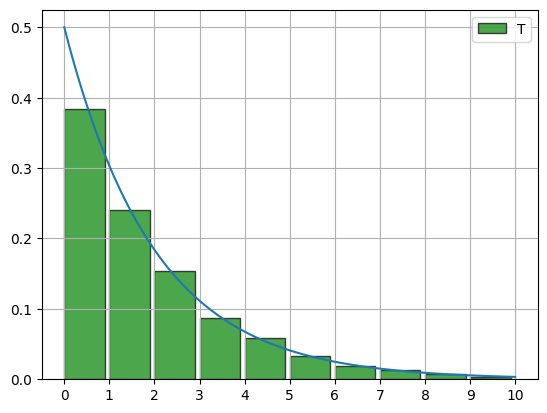

In [3]:
# simulare T
from scipy.stats import expon, uniform, randint
from matplotlib.pyplot import grid, legend, hist, show, xticks, plot
from numpy import linspace, mean, floor

samples_num = 10000
timpi = expon.rvs(scale=2, size = samples_num)

hist(timpi, 10, range = (0, 10), density=True, color='green', edgecolor='black', alpha=0.7, width=0.9, label='T')
x = linspace(0, 10, 1000)
plot(x, expon.pdf(x, scale=2))
xticks([x for x in range(0,11)])
legend(loc='best')
grid()
show()


In [4]:
# P(N > 5)
# estimata
from scipy.stats import uniform, expon

timpi = expon.rvs(scale=2, size = samples_num)
note = uniform.rvs(loc=1,scale=10 ,size=samples_num)
note_finale = []
for i in range(samples_num):
    nota_finala = note[i] - floor(timpi[i])
    if nota_finala < 1:
        note_finale.append(1)
    else:
        note_finale.append(nota_finala)
note_gt_5 = [nota for nota in note_finale if nota>= 5]
print(len(note_gt_5)/samples_num)


# P(N > k) = P('a se obtine nota aia') * P('sa avem cel mult x minute intarziere'), unde x e intarzierea maxima permisa ca sa ramanem cu nota peste 5:
# 10 - 6 minute intarziere = 4 deci pana in 6 min, deci 10 - 4 
# 9 - 5 minute intarziere = 4 deci pana in 5 min, deci 9 - 4
# ...
probabilitate_teoretica = sum([uniform.pdf(nota, 1, 10) * expon.cdf(nota-4, scale=2) for nota in range(5, 11)])
print(probabilitate_teoretica)


0.4524
0.45352523887391194


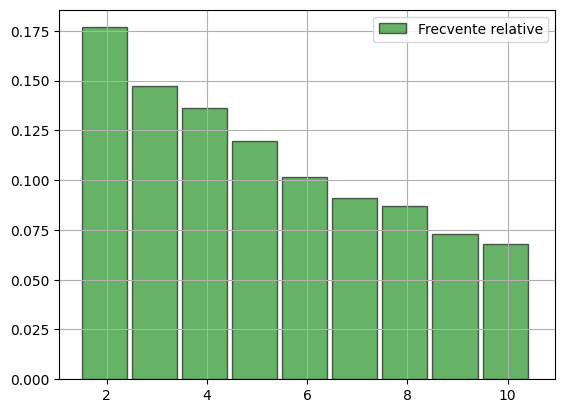

P(X > 10):
*estimata:  0.3231
*teoretica:  0.32739814342327334


In [36]:
from scipy.stats import norm, geom
m = 165
deviatie = 20
sample_size=10000

# calculam probabilitatea ca o persoana sa aiba cel putin 1.90
probabilitate = 1 - norm.cdf(190, loc = m, scale = deviatie)

# simulam de 10000 extrageri, fiecare extragere se opreste cand gasim o persoana <= 190 (X)
X = geom.rvs(probabilitate, size=sample_size)
bin_edges = [k + 0.5 for k in range(1, 11)]

hist(X, bin_edges, density=True, color='green', edgecolor='black', alpha=0.6, width=0.9, label='Frecvente relative')

legend(loc='best')
grid()
show()

# estimare P(X > 10)
probabilitate_estimata = len([x for x in X if x > 10]) / sample_size
print('P(X > 10):')
print('*estimata: ', probabilitate_estimata)

# teoretica
probabilitate_teoretica = 1 - geom.cdf(10, p=probabilitate)
print('*teoretica: ', probabilitate_teoretica)
